<a href="https://colab.research.google.com/github/yakshteja2004/Oasis-Infobyte-/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the wine dataset (replace path if needed)
data = pd.read_csv("/content/WineQT.csv")

# Display first few rows
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# Checking basic info about dataset
data.info()

# Checking for null values
print("\nMissing Values:\n", data.isnull().sum())

# Statistical summary
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB

Missing Values:
 fixed acidity           0
volatile acidity        0
citri

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


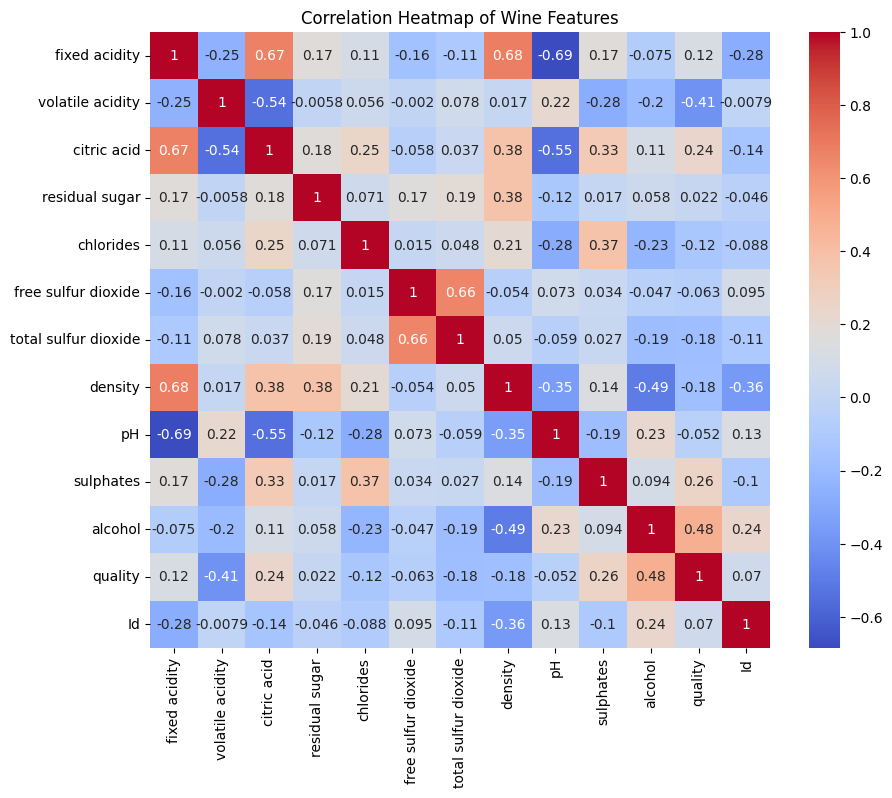

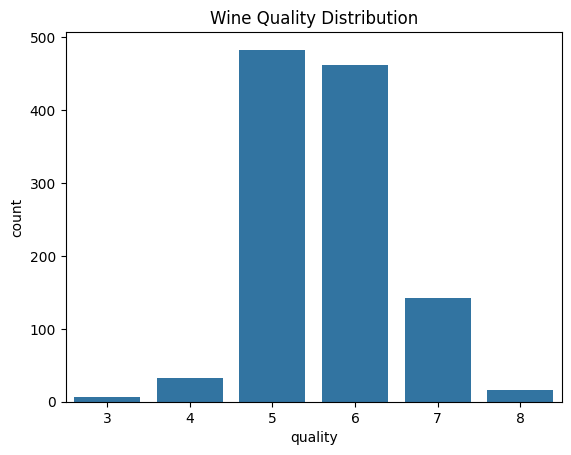

In [5]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Wine Features")
plt.show()

# Quality distribution
sns.countplot(x='quality', data=data)
plt.title("Wine Quality Distribution")
plt.show()

In [6]:
# Define features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Convert quality into binary classification for simplicity (good vs bad)
y = y.apply(lambda x: 1 if x >= 7 else 0)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print(" Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

 Logistic Regression Accuracy: 0.8995633187772926

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       201
           1       0.60      0.54      0.57        28

    accuracy                           0.90       229
   macro avg       0.77      0.74      0.75       229
weighted avg       0.90      0.90      0.90       229



In [9]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.8558951965065502

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       201
           1       0.44      0.64      0.52        28

    accuracy                           0.86       229
   macro avg       0.69      0.76      0.72       229
weighted avg       0.88      0.86      0.87       229



In [10]:
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

print(" Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))

 Random Forest Accuracy: 0.9344978165938864

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       201
           1       0.78      0.64      0.71        28

    accuracy                           0.93       229
   macro avg       0.87      0.81      0.83       229
weighted avg       0.93      0.93      0.93       229



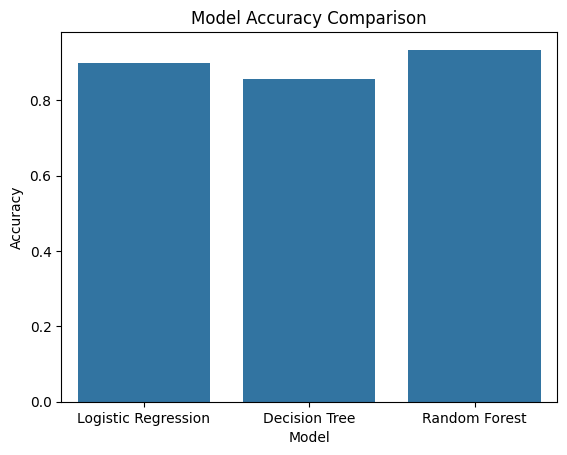

,Model,Accuracy
0,Logistic Regression,0.899563
1,Decision Tree,0.855895
2,Random Forest,0.934498


In [11]:
# Comparing accuracy of all models
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_forest)
    ]
}

results_df = pd.DataFrame(results)
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()

results_df

In [12]:
print(" Random Forest Classifier gives the best accuracy among the models.")
print("This model can be used to predict wine quality based on chemical properties.")

 Random Forest Classifier gives the best accuracy among the models.
This model can be used to predict wine quality based on chemical properties.
